# Feature Engineering

| ID | Name | Country | Age | Member | Score A | Score B | Class |
| ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- | ----------- |
| 7896 | Mark | Canada | 45 | 1 | 180 | 9 | A
| 9865 | Yuze | Japan | | 0 | 165 | 8.5 | B
| 4678 | Becky | USA | 38 | Y | 140 | 6 | B
| 3324 | Mike | 890 | 50 | 0 | 90 | 8.7 | C
| 7896 | Mark | Canada | 45 | 1 | 180 | 9 | A
| 7896 | Jose | Mexico | 98 | 0 | 60.5 | 5 | A
| 8962 | Emma | Germany | 39 | 1 | 140 | 8 | B


- Inappropriate value for country 890 (number) need to check if it's a data entry error or if it came from a different system that relies on code for country. We can `replace()` to clean it up
- Inconsistent binary flag Y/N vs 1/0. 
- Missing value for age. drop or replace(impute). Maybe the database placed in Japan had an issue with data transfer 
- We have duplicates for Mark
- Different data scale between Score A and Score B. We need to consider normalizing it.
- ID is not unique between Jose and Mark. We need to find a better key if needed
- Possible outlier with a high age (98 for Jose)
- String values for categorical columns. For ML, we need to encode such values. e.g. Country: 1,2,3,4,etc... instead of USA, Japan, Canada, etc...
- Feature selection:
    - Name may not present valuable insights to the algorithm. it can be dropped
    - ID seems to be unreliable, and it doesn't have a meaning, it can also be dropped if we don't need to use it for a join operation
- Feature Extraction:
    - Continent from country
    - Age bins from age

## Features
- In machine learning for tabular data, algorithms are fed a collection of numeric information that are packaged ina  2-D array.
- Understanding the meaning behind these features and their reliability is critical to the success of the machine learning algorithm
- Columns of information are called features
- They can be dropped, enhanced, merged, encoded, and/or extracted
- The performance of the machine learning algorithm and the processing relies on successful feature engineering

## Feature Engineering Techniques
Most common techniques:
1. Imputation: handling missing values
2. Outlier Treatment: removing or replacing outliers
3. Feature Extraction:
    - Binning: Converting continuous values to intervals (categories)
    - Extracting Information: from existing data you can derive new indicators or values from existing features
    - Grouping Operations/Aggregation: average score from math, reading, and writing scores
4. Encoding: transforming categorical data into numerical values
5. Scaling: normalizing or standardizing the data into a consistent scale
6. Feature Selection: selecting the features that are important for the model and reducing redundancy
7. Dimensionality Reduction 


## Imputation

- What is imputation?</br>
    - The replacement of missing or inconsistent/false data elements with approximated values. 
- Why it's needed?
    - Machines don’t handle missing data situations well

#### Basic Techniques
- They are the easiest to implement and most popular.
- For numerical data:
    - Mean/Median/Mode Imputation
    - Arbitrary value
- For categorical data:
    - Mode (most frequent value)
    - Add "missing" label as a new category e.g. replace 890 with 'unknown country' from the example above
- When to use:
    - Use overall Mean/Median/Mode when the data is missing at random 
    - A more sophisticated approach is to use 3Ms by sub-groups
- Pros:
    - Easy to implement 
    - Simple syntax and fast processing
    - Can be used in production pipeline (cost effective)
- Cons:
    - Possibility of distorting the data distribution (changing the variance) - the effect of this gets more noticeable when you ave a high ratio of missing values 
    - It only works on individual columns - the advanced approach of replacing average by sub-group fixes this issue
> NOTE: If you have a high ratio (over 30% for example) of missing values, it's not recommended to proceed with imputation as it will cause more harm than good.

There are 2 popular libraries to perform imputation `pandas` and `sklearn`

`pip install scikit-learn`

- Simple and efficient tools for predictive data analysis
- Accessible to everybody, and reusable in various contexts
- Built on NumPy, SciPy, and matplotlib
- Open source, commercially usable - BSD license
- It is considered a cornerstone in machine learning and data science 
- Very comprehensive:
    - Tools for data preprocessing
    - Machine Learning algorithms
    - Performance Measurement
    - Machine Learning Automation

In [46]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

In [47]:
students = {
            'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd'],
            'Score' : [40, np.nan, 44, np.nan, 26, 39, 42, np.nan],
            'University' : ['UTC', np.nan, 'MSU', 'MIT', 'CalTech', 'CalTech', 'CalTech', 'MSU'],
            }

df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,NaN
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


##### Using `sklearn`

In [48]:
df_1 = df.copy()

In [49]:
# replace the nulls with average
imputer = SimpleImputer(strategy='mean')

#apply the imputer method on the score 
df_1['Score'] = imputer.fit_transform(df_1[['Score']]) #or use fit_transform(df_1['Score'].values.reshape(-1,1))

df_1

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


##### Using `pandas`

In [50]:
df_2 = df.copy()

df_2['Score'] = df_2['Score'].fillna(df_2['Score'].mean())
df_2

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


> NOTE: if your data is heavily skewed, you may want to consider using median over mean. Because it's a better representative of the most common value.

![skewness](https://www.biologyforlife.com/uploads/2/2/3/9/22392738/c101b0da6ea1a0dab31f80d9963b0368_orig.png)

For Categorical

In [51]:
imputer = SimpleImputer(strategy='most_frequent')

df_1['University'] = imputer.fit_transform(df_1[['University']])[:,0]
df_1

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,CalTech
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


Using an arbitrary value

In [52]:
df_1a = df.copy()
imputer = SimpleImputer(strategy='constant', fill_value='missing')
df_1a['University'] = imputer.fit_transform(df_1a[['University']])[:,0]
df_1a

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,missing
2,John,44.0,MSU
3,Amy,NaN,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU


Using `pandas`

In [53]:
df_2['University'] = df_2['University'].fillna(df_2['University'].mode()) # some versions need to have [0] added
df_2

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,38.2,NaN
2,John,44.0,MSU
3,Amy,38.2,MIT
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,38.2,MSU


In [54]:
df_3 = df.copy()

df_3 = df_3.dropna()
#df_3.dropna(inplace=True)

df_3

,Name,Score,University
0,Mark,40.0,UTC
2,John,44.0,MSU
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech


Sophisticated approach: using mean of subgroups instead of blanket mean value 

In [55]:
students = {
            'Name' : ['Mark', 'Alex', 'John', 'Amy', 'Steve', 'Ally', 'Kelly', 'Todd', 'Noel'],
            'Score' : [40, np.nan, 44, np.nan, 26, 39, 42, np.nan, 51],
            'University' : ['UTC', 'MSU', 'MSU', 'CalTech', 'CalTech', 'CalTech', 'CalTech', 'MSU', 'MSU'],
            }

df = pd.DataFrame(students)
df

,Name,Score,University
0,Mark,40.0,UTC
1,Alex,NaN,MSU
2,John,44.0,MSU
3,Amy,NaN,CalTech
4,Steve,26.0,CalTech
5,Ally,39.0,CalTech
6,Kelly,42.0,CalTech
7,Todd,NaN,MSU
8,Noel,51.0,MSU


We can see that we have samples of CalTech and MSU to fill missing values

In [56]:
df.groupby('University')['Score'].mean()

University
CalTech    35.666667
MSU        47.500000
UTC        40.000000
Name: Score, dtype: float64

We can use the `transform()` function leverage groupby

In [57]:
df['Score'] = df.groupby('University')['Score'].transform(lambda s: round(s.fillna(s.mean()),2))
df

,Name,Score,University
0,Mark,40.00,UTC
1,Alex,47.50,MSU
2,John,44.00,MSU
3,Amy,35.67,CalTech
4,Steve,26.00,CalTech
5,Ally,39.00,CalTech
6,Kelly,42.00,CalTech
7,Todd,47.50,MSU
8,Noel,51.00,MSU


#### Advanced Techniques
- Using ML or statistical analysis
- Pros: 
    - We can impute the data with more relevant information
    - In other words, it focuses on replacing value for a column relevant to other columns in the data
- Cons:
    - Computationally heavy
- Techniques:
    - KNN Imputer - K-Nearest Neighbor 
    - Extrapolation technique 

In [58]:
from sklearn.impute import KNNImputer

In [59]:
data = np.array([[1, 4,6,np.nan],
        [0, 7,9,np.nan],
        [np.nan, 7,3,10],
        [1, np.nan, 4, 4]])

data

array([[ 1.,  4.,  6., nan],
       [ 0.,  7.,  9., nan],
       [nan,  7.,  3., 10.],
       [ 1., nan,  4.,  4.]])

In [60]:
imputer = KNNImputer(n_neighbors=2)

data = imputer.fit_transform(data)
data

array([[ 1. ,  4. ,  6. ,  7. ],
       [ 0. ,  7. ,  9. ,  7. ],
       [ 0.5,  7. ,  3. , 10. ],
       [ 1. ,  5.5,  4. ,  4. ]])

The extrapolation technique is recommended for time series data

In [61]:
data = {
    'time': [ 1,2,3,4,5,6,7,8,9,10],
    'value': [10, 20, 18, np.nan, 40, 46, np.nan, np.nan, 58, 62]
}

df = pd.DataFrame(data)
df

,time,value
0,1,10.0
1,2,20.0
2,3,18.0
3,4,NaN
4,5,40.0
5,6,46.0
6,7,NaN
7,8,NaN
8,9,58.0
9,10,62.0


In [62]:
from scipy.interpolate import interp1d 

In [63]:
missing_val_indices = df[df['value'].isna()].index
missing_val_indices

Index([3, 6, 7], dtype='int64')

In [64]:
non_na_time = df['time'][~df['value'].isna()]
non_na_time

0     1
1     2
2     3
4     5
5     6
8     9
9    10
Name: time, dtype: int64

In [65]:
non_na_value = df['value'][~df['value'].isna()]

In [66]:
interp_function = interp1d(non_na_time, non_na_value, fill_value='extrapolate')

In [67]:
df.loc[missing_val_indices, 'value'] = interp_function(df['time'][missing_val_indices])
df

,time,value
0,1,10.0
1,2,20.0
2,3,18.0
3,4,29.0
4,5,40.0
5,6,46.0
6,7,50.0
7,8,54.0
8,9,58.0
9,10,62.0


## Outlier Treatment

In [68]:
data_url = 'https://lib.stat.cmu.edu/datasets/boston'
raw_data = pd.read_csv(data_url, skiprows=22, sep='\s+', header=None)
raw_data

,0,1,2,3,4,5,6,7,8,9,10
0,0.00632,18.00,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3
1,396.90000,4.98,24.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.02731,0.00,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8
3,396.90000,9.14,21.60,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.02729,0.00,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8
...,...,...,...,...,...,...,...,...,...,...,...
1007,396.90000,5.64,23.90,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1008,0.10959,0.00,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0
1009,393.45000,6.48,22.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1010,0.04741,0.00,11.93,0.0,0.573,6.030,80.8,2.5050,1.0,273.0,21.0


In [69]:
raw_data.values[0::2,:] # grab every second (even numbered row)

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.0000e+00, 2.9600e+02,
        1.5300e+01],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 2.0000e+00, 2.4200e+02,
        1.7800e+01],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 1.0000e+00, 2.7300e+02,
        2.1000e+01]])

In [70]:
raw_data.values[1::2,:]

array([[396.9 ,   4.98,  24.  , ...,    nan,    nan,    nan],
       [396.9 ,   9.14,  21.6 , ...,    nan,    nan,    nan],
       [392.83,   4.03,  34.7 , ...,    nan,    nan,    nan],
       ...,
       [396.9 ,   5.64,  23.9 , ...,    nan,    nan,    nan],
       [393.45,   6.48,  22.  , ...,    nan,    nan,    nan],
       [396.9 ,   7.88,  11.9 , ...,    nan,    nan,    nan]])

In [71]:
data = np.hstack([raw_data.values[0::2,:], raw_data.values[1::2,:3]])

df = pd.DataFrame(data)
df.head(10)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


Get the columns names data

In [72]:
raw_cols = pd.read_csv(data_url, sep='\t', skiprows=7, nrows=14, header=None)
raw_cols

,0
0,CRIM per capita crime rate by town
1,ZN proportion of residential land zoned...
2,INDUS proportion of non-retail business ac...
3,CHAS Charles River dummy variable (= 1 if...
4,NOX nitric oxides concentration (parts p...
5,RM average number of rooms per dwelling
6,AGE proportion of owner-occupied units b...
7,DIS weighted distances to five Boston em...
8,RAD index of accessibility to radial hig...
9,TAX full-value property-tax rate per $10...


In [73]:
list(raw_cols[0].str.split().str[0])

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT',
 'MEDV']

In [74]:
df.columns = list(raw_cols[0].str.split().str[0])
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [76]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [77]:
df['CHAS'].unique()

array([0., 1.])

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df.shape

(506, 14)

<Axes: >

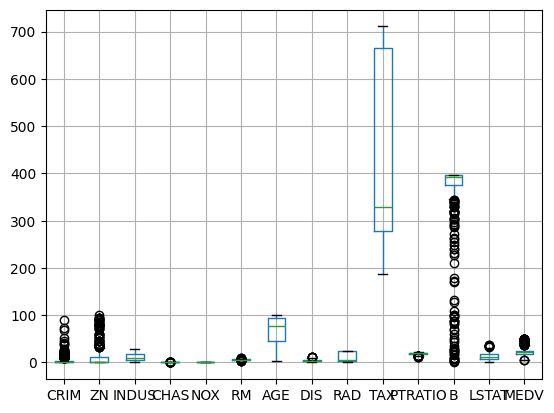

In [80]:
df.boxplot()

The viz above is not useful because I have wide and tight ranges for different columns. We need to consider subplots to have a unique axis range for each column.

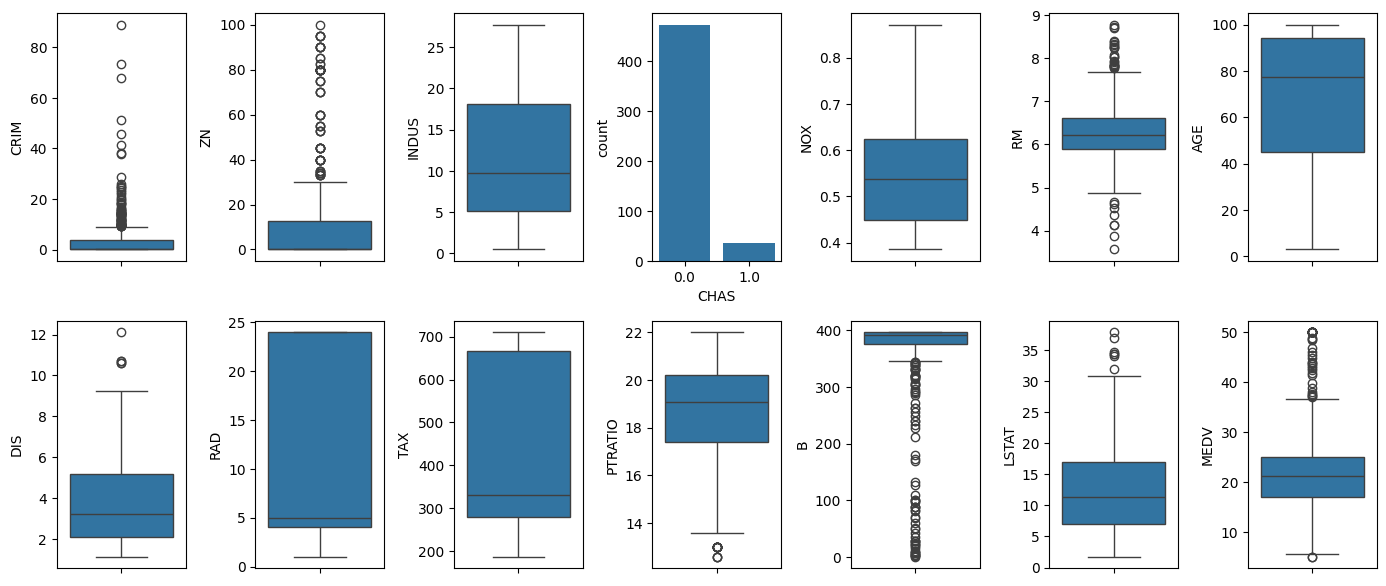

In [81]:
# define a column list
fig, axes = plt.subplots(nrows=2, ncols=7, figsize=(14,6))

#flatten the axes so we can have a series from 0 to 3 instead of [0,0] for example
axes = axes.flatten()

#loop through each column name and plot it
for idx, col in enumerate(df.columns):
    if col != 'CHAS':
        sns.boxplot(data=df, y=col, ax=axes[idx])
    else:
        sns.countplot(data=df, x=col, ax=axes[idx])

fig.tight_layout(pad=1.2, w_pad=1)


**Observations**
- CRIM, ZN, RM, B, LSTAT, and MEDV have lots of outliers
- These columns need to have outlier treatment 

We have 3 popular techniques for outlier treatment:
1. IQR Method: Inter-Quartile Range (strict method)
2. Using Z-Score with Standard Deviation (more control to define a threshold)
3. Using Percentiles/Quintiles (more control to define a threshold)

![boxaplot](https://miro.medium.com/max/8100/1*NRlqiZGQdsIyAu0KzP7LaQ.png)

We can build a custom function that calculates the lower and upper bounds of the whiskers using the IQR method.

In [82]:
def outlier_iqr(col):
    #step 1
    Q1, Q3 = np.percentile(col, [25, 75])
    
    #step2
    IQR = Q3 - Q1

    #step 3
    lower_range = Q1 - 1.5 * IQR
    upper_range = Q3 + 1.5 * IQR

    return lower_range, upper_range

In [83]:
lower_range, upper_range = outlier_iqr(df['MEDV'])
print(f'Lower Range: {lower_range:.2f} | Upper Range: {upper_range:.2f}')

Lower Range: 5.06 | Upper Range: 36.96


<Axes: xlabel='MEDV'>

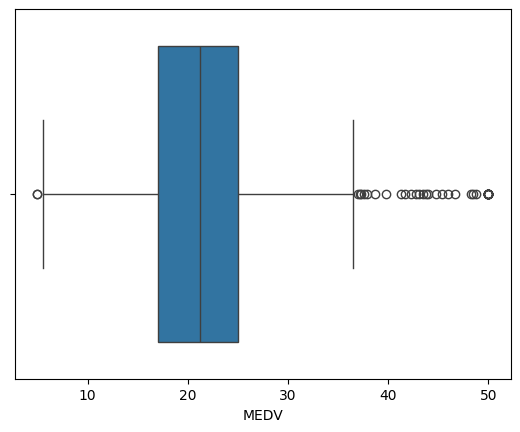

In [84]:
sns.boxplot(x=df['MEDV'])

In [85]:
outlier_filter = (df['MEDV'] > lower_range) & (df['MEDV'] <  upper_range)

df_no_ol =df[outlier_filter]

Text(0.5, 1.0, 'After Outlier Treatment')

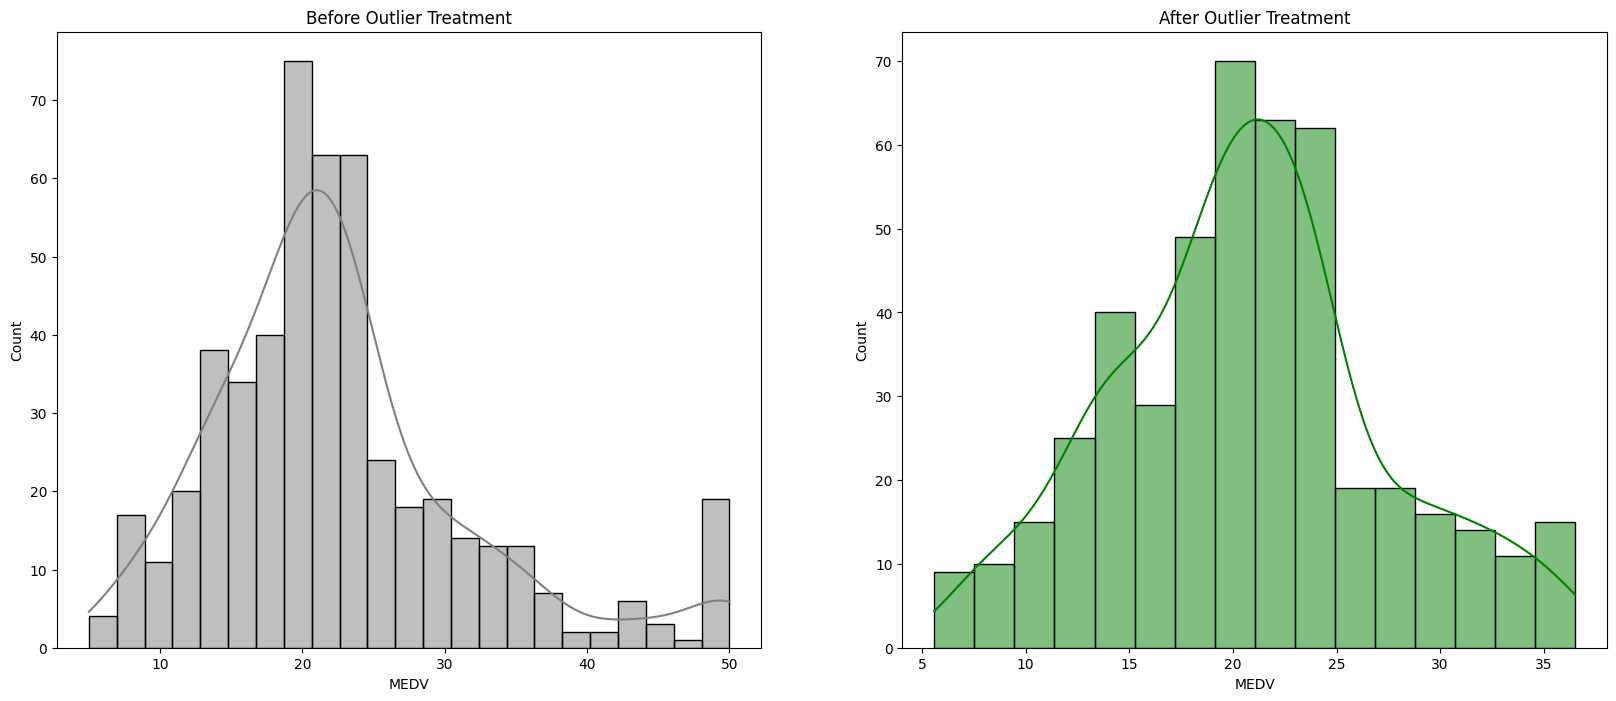

In [88]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
axes = axes.flatten()
sns.histplot(x=df['MEDV'], ax=axes[0], kde=True, color='gray')
axes[0].set_title('Before Outlier Treatment')
sns.histplot(x=df_no_ol['MEDV'], ax=axes[1], kde=True, color='green')
axes[1].set_title('After Outlier Treatment')


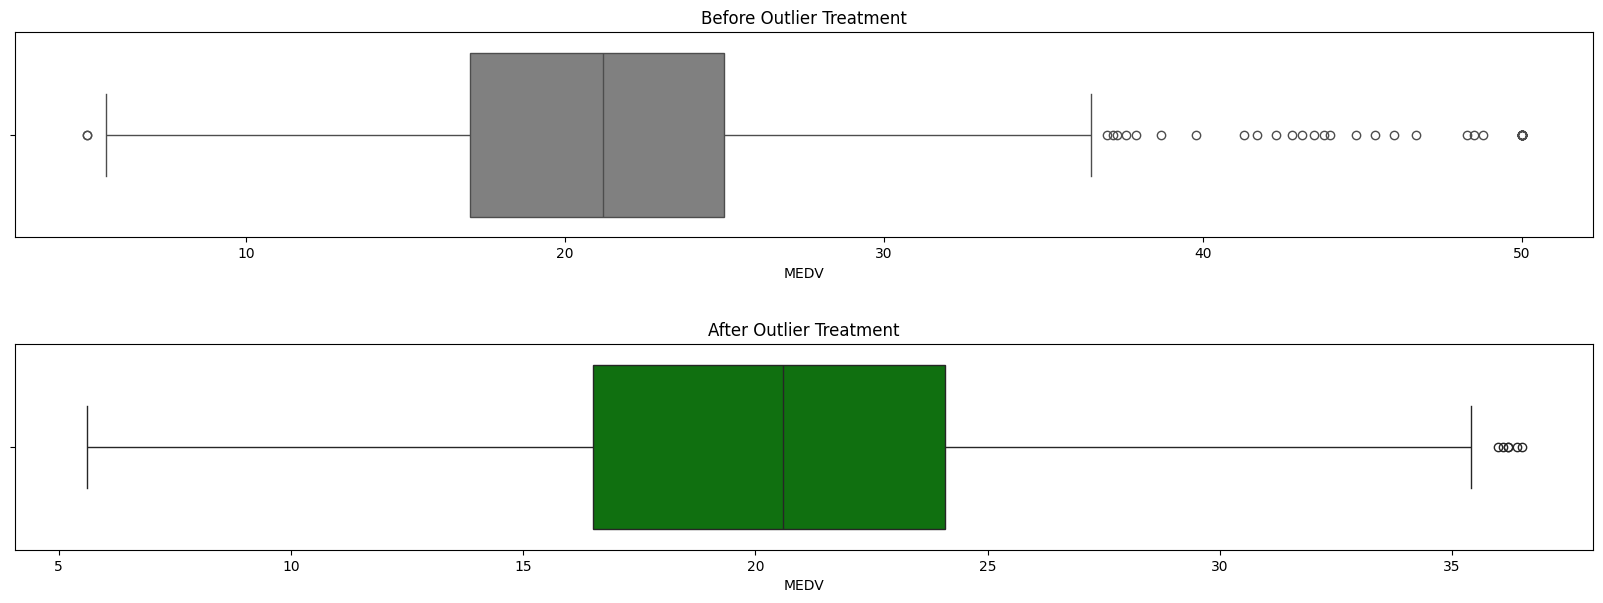

In [93]:
fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(16,6))
axes = axes.flatten()
sns.boxplot(x=df['MEDV'], ax=axes[0],  color='gray')
axes[0].set_title('Before Outlier Treatment')
sns.boxplot(x=df_no_ol['MEDV'], ax=axes[1],  color='green')
axes[1].set_title('After Outlier Treatment')

plt.tight_layout(pad=0.6, h_pad=3)

NOTES:
- Removing outliers for a column, means other values got dropped too (dropping the rows with outliers)
- It's very important to analyze the outcome of the operation

We can check the skewness of all other columns if it got worse.

In [95]:
df.drop(columns='CHAS').skew()

CRIM       5.223149
ZN         2.225666
INDUS      0.295022
NOX        0.729308
RM         0.403612
AGE       -0.598963
DIS        1.011781
RAD        1.004815
TAX        0.669956
PTRATIO   -0.802325
B         -2.890374
LSTAT      0.906460
MEDV       1.108098
dtype: float64

Before vs After Comparison

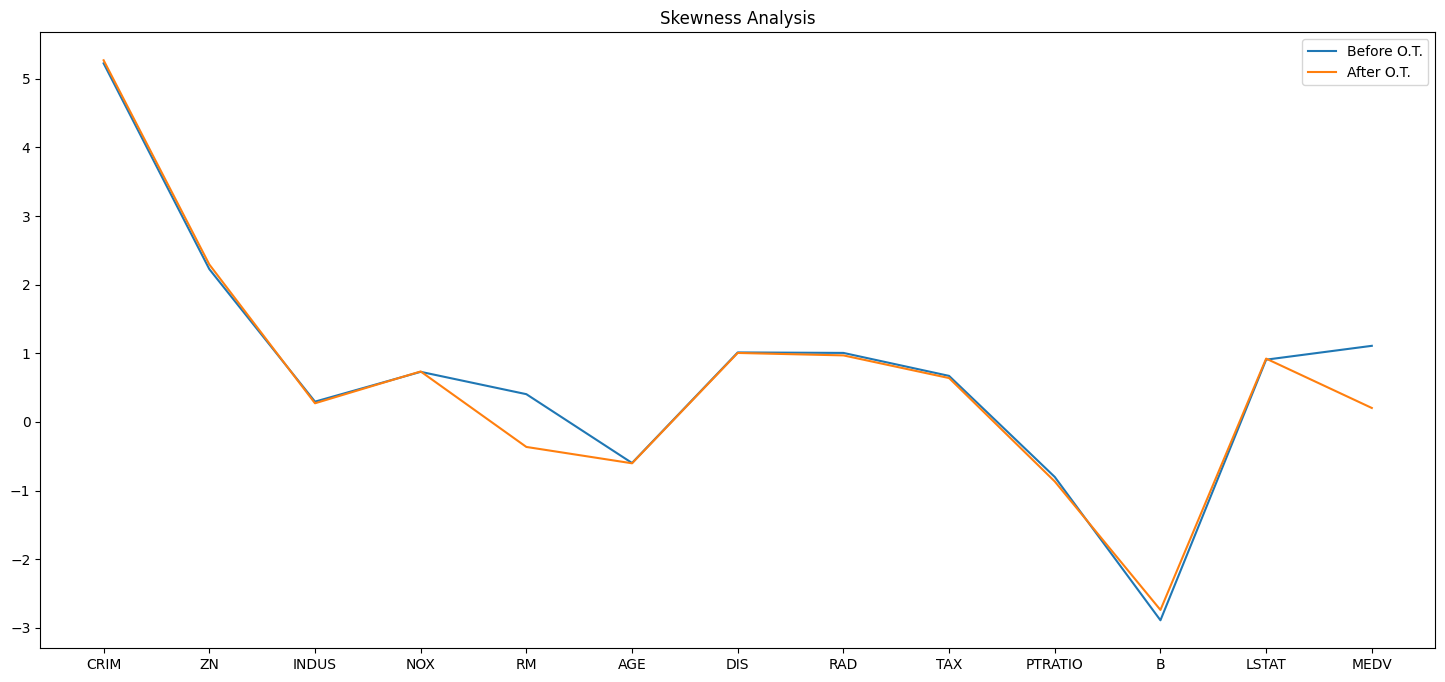

In [99]:
plt.figure(figsize=(18,8))

plt.plot(df.drop(columns='CHAS').skew(), label='Before O.T.')
plt.plot(df_no_ol.drop(columns='CHAS').skew(), label='After O.T.')
plt.title('Skewness Analysis')
plt.legend()

We can see the process of outlier removal for MEDV is slightly better for RM, B, and MEDV features, unchanged for others

#### Method 2: Z-Score Outlier Treatment

In [100]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/HousePrices.csv')
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


<Axes: xlabel='price'>

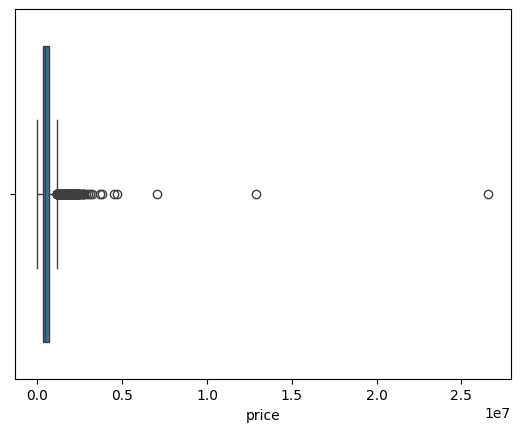

In [101]:
sns.boxplot(x=df['price'])

In [105]:
print(f"{df['price'].max():,}")

26,590,000.0


Steps:
1. Standardize the targeted column for outlier treatment using `zscore` function
2. Use the desired Standard Deviation threshold to trim out outliers

In [106]:
from scipy.stats import zscore

In [107]:
df['price_zscore'] = zscore(df['price'])

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_zscore
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482


In [108]:
upper_threshold = 2
lower_threshold = -2.5

# instead of dropping the outliers, we can add  an indicator to use it as a filter all in the same dataset
df['outliers'] = np.where(df['price_zscore']>upper_threshold, True,
                          np.where(df['price_zscore']<lower_threshold, True, False))

df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country,price_zscore,outliers
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864,False
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424,False
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071,False
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482,False


<Axes: xlabel='price', ylabel='Count'>

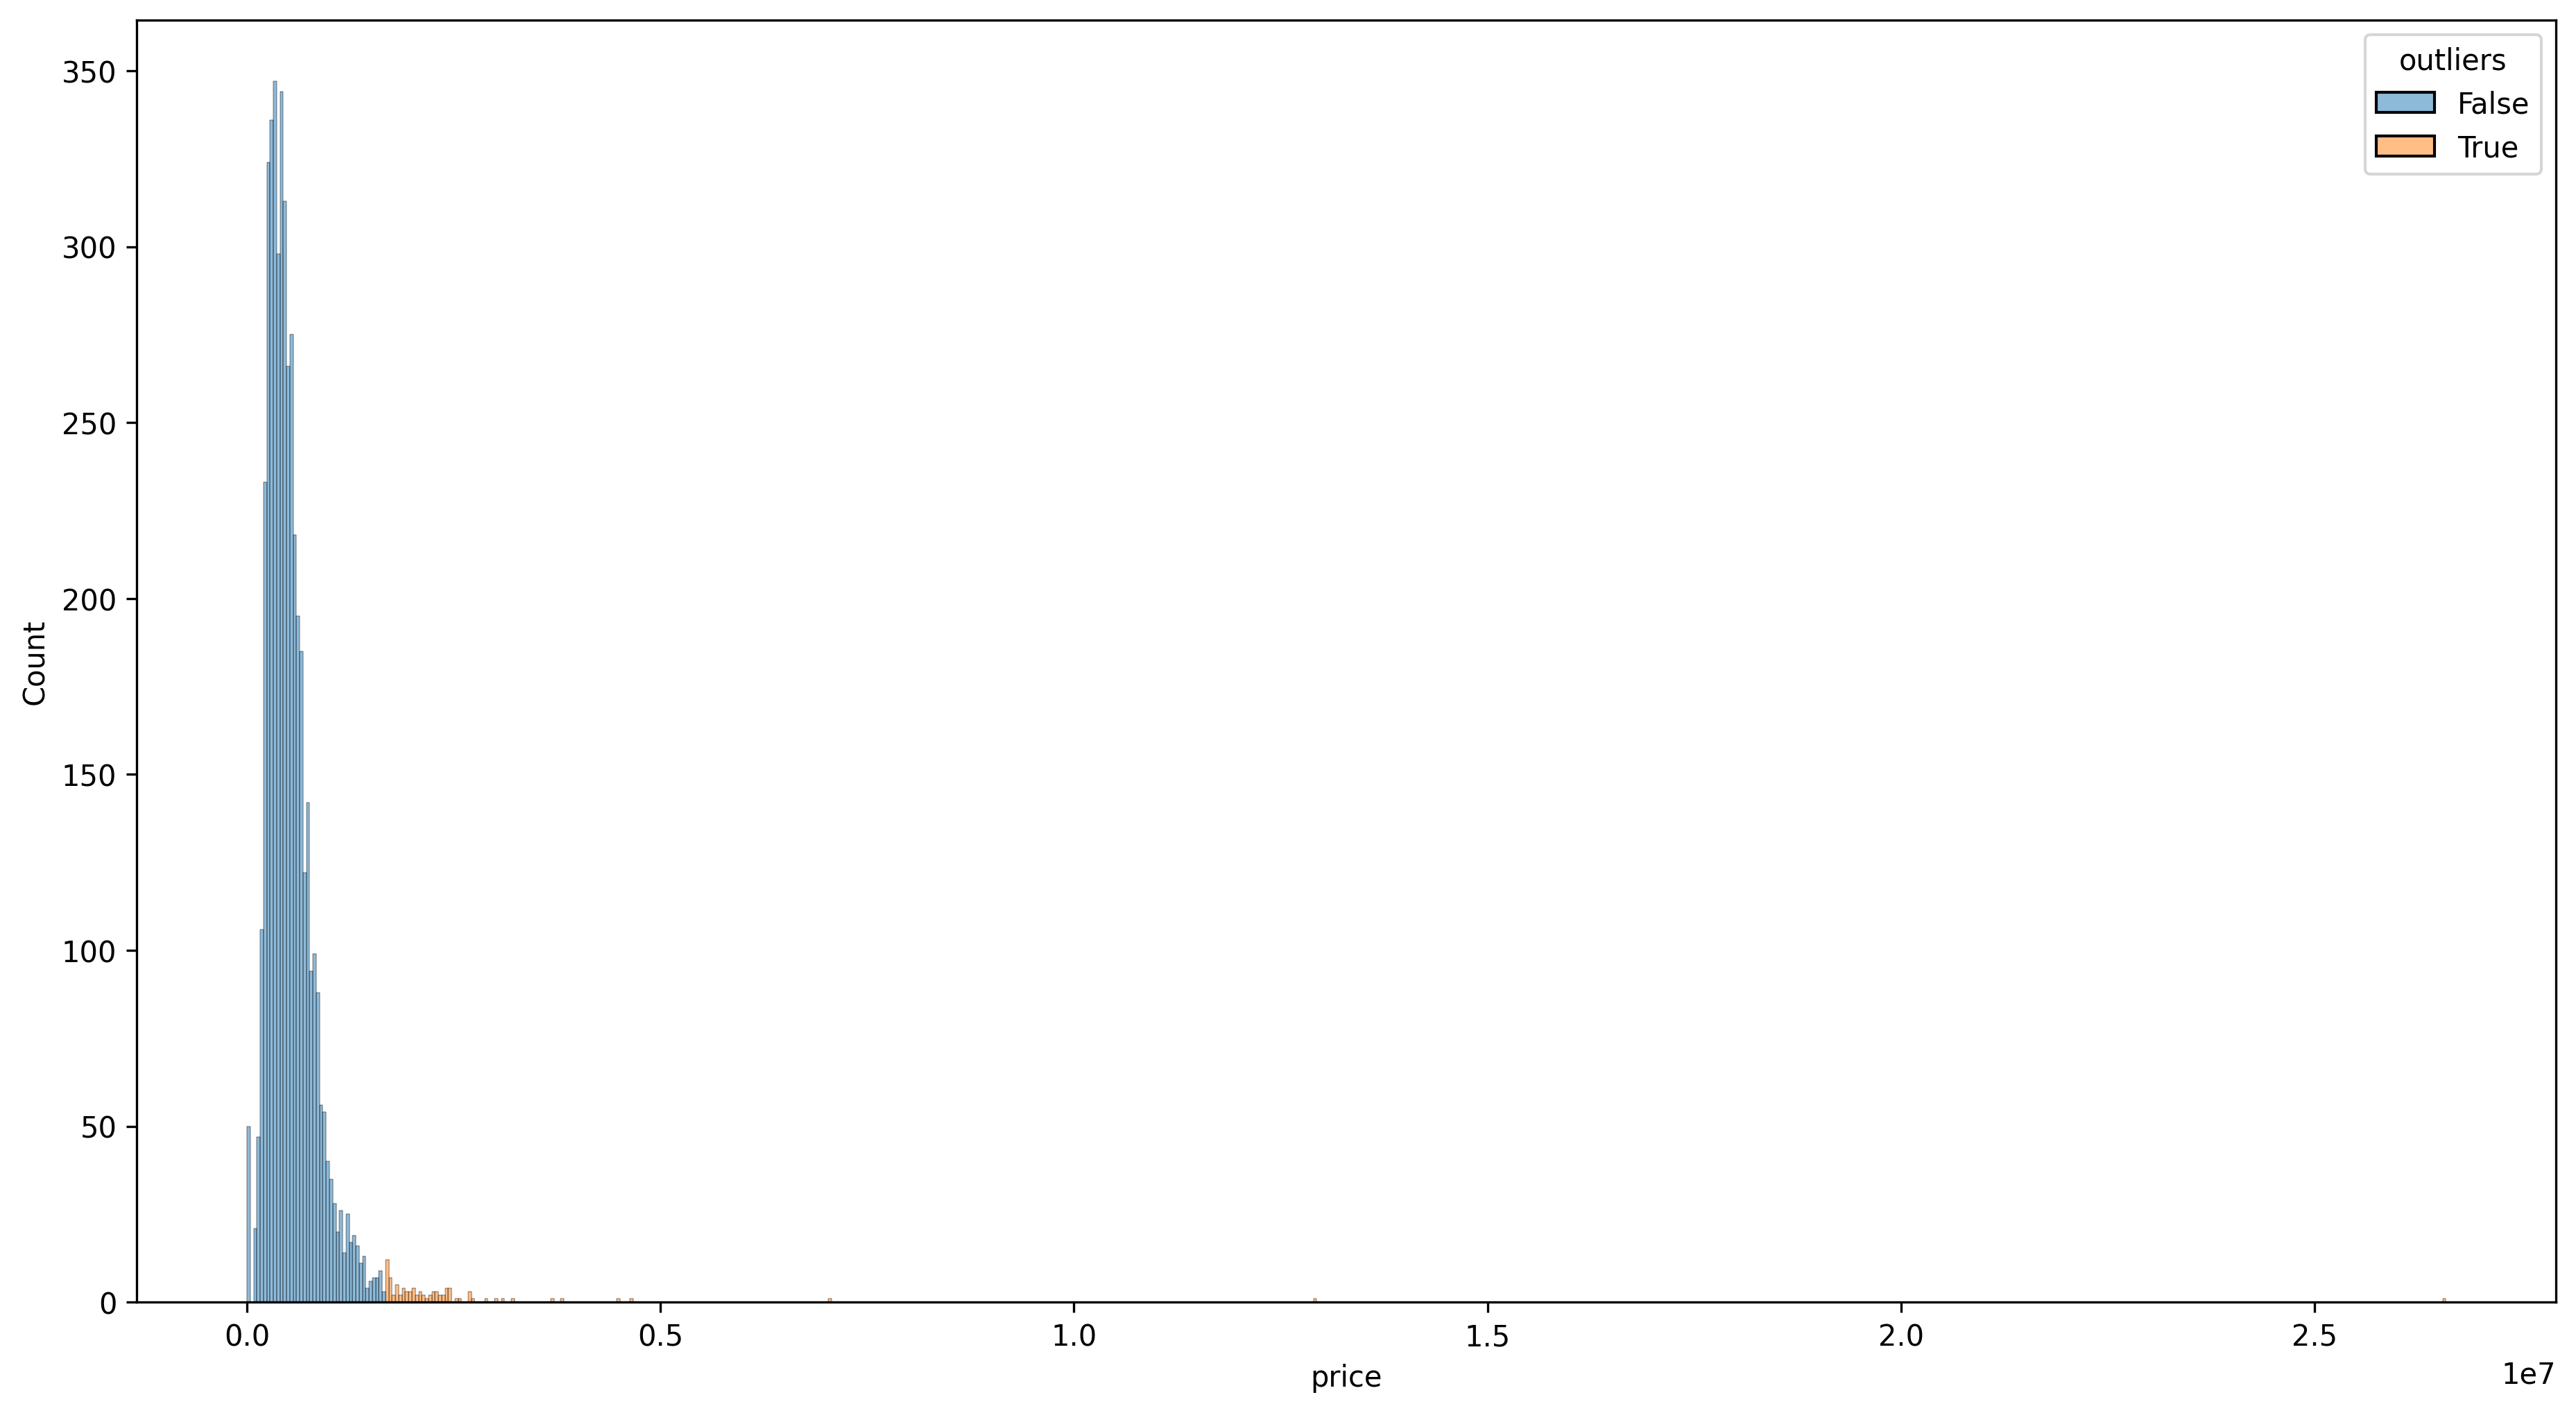

In [111]:
plt.figure(figsize=(15,8), dpi=300)

sns.histplot(data=df, x='price', hue=df['outliers'])

<Axes: xlabel='price', ylabel='Count'>

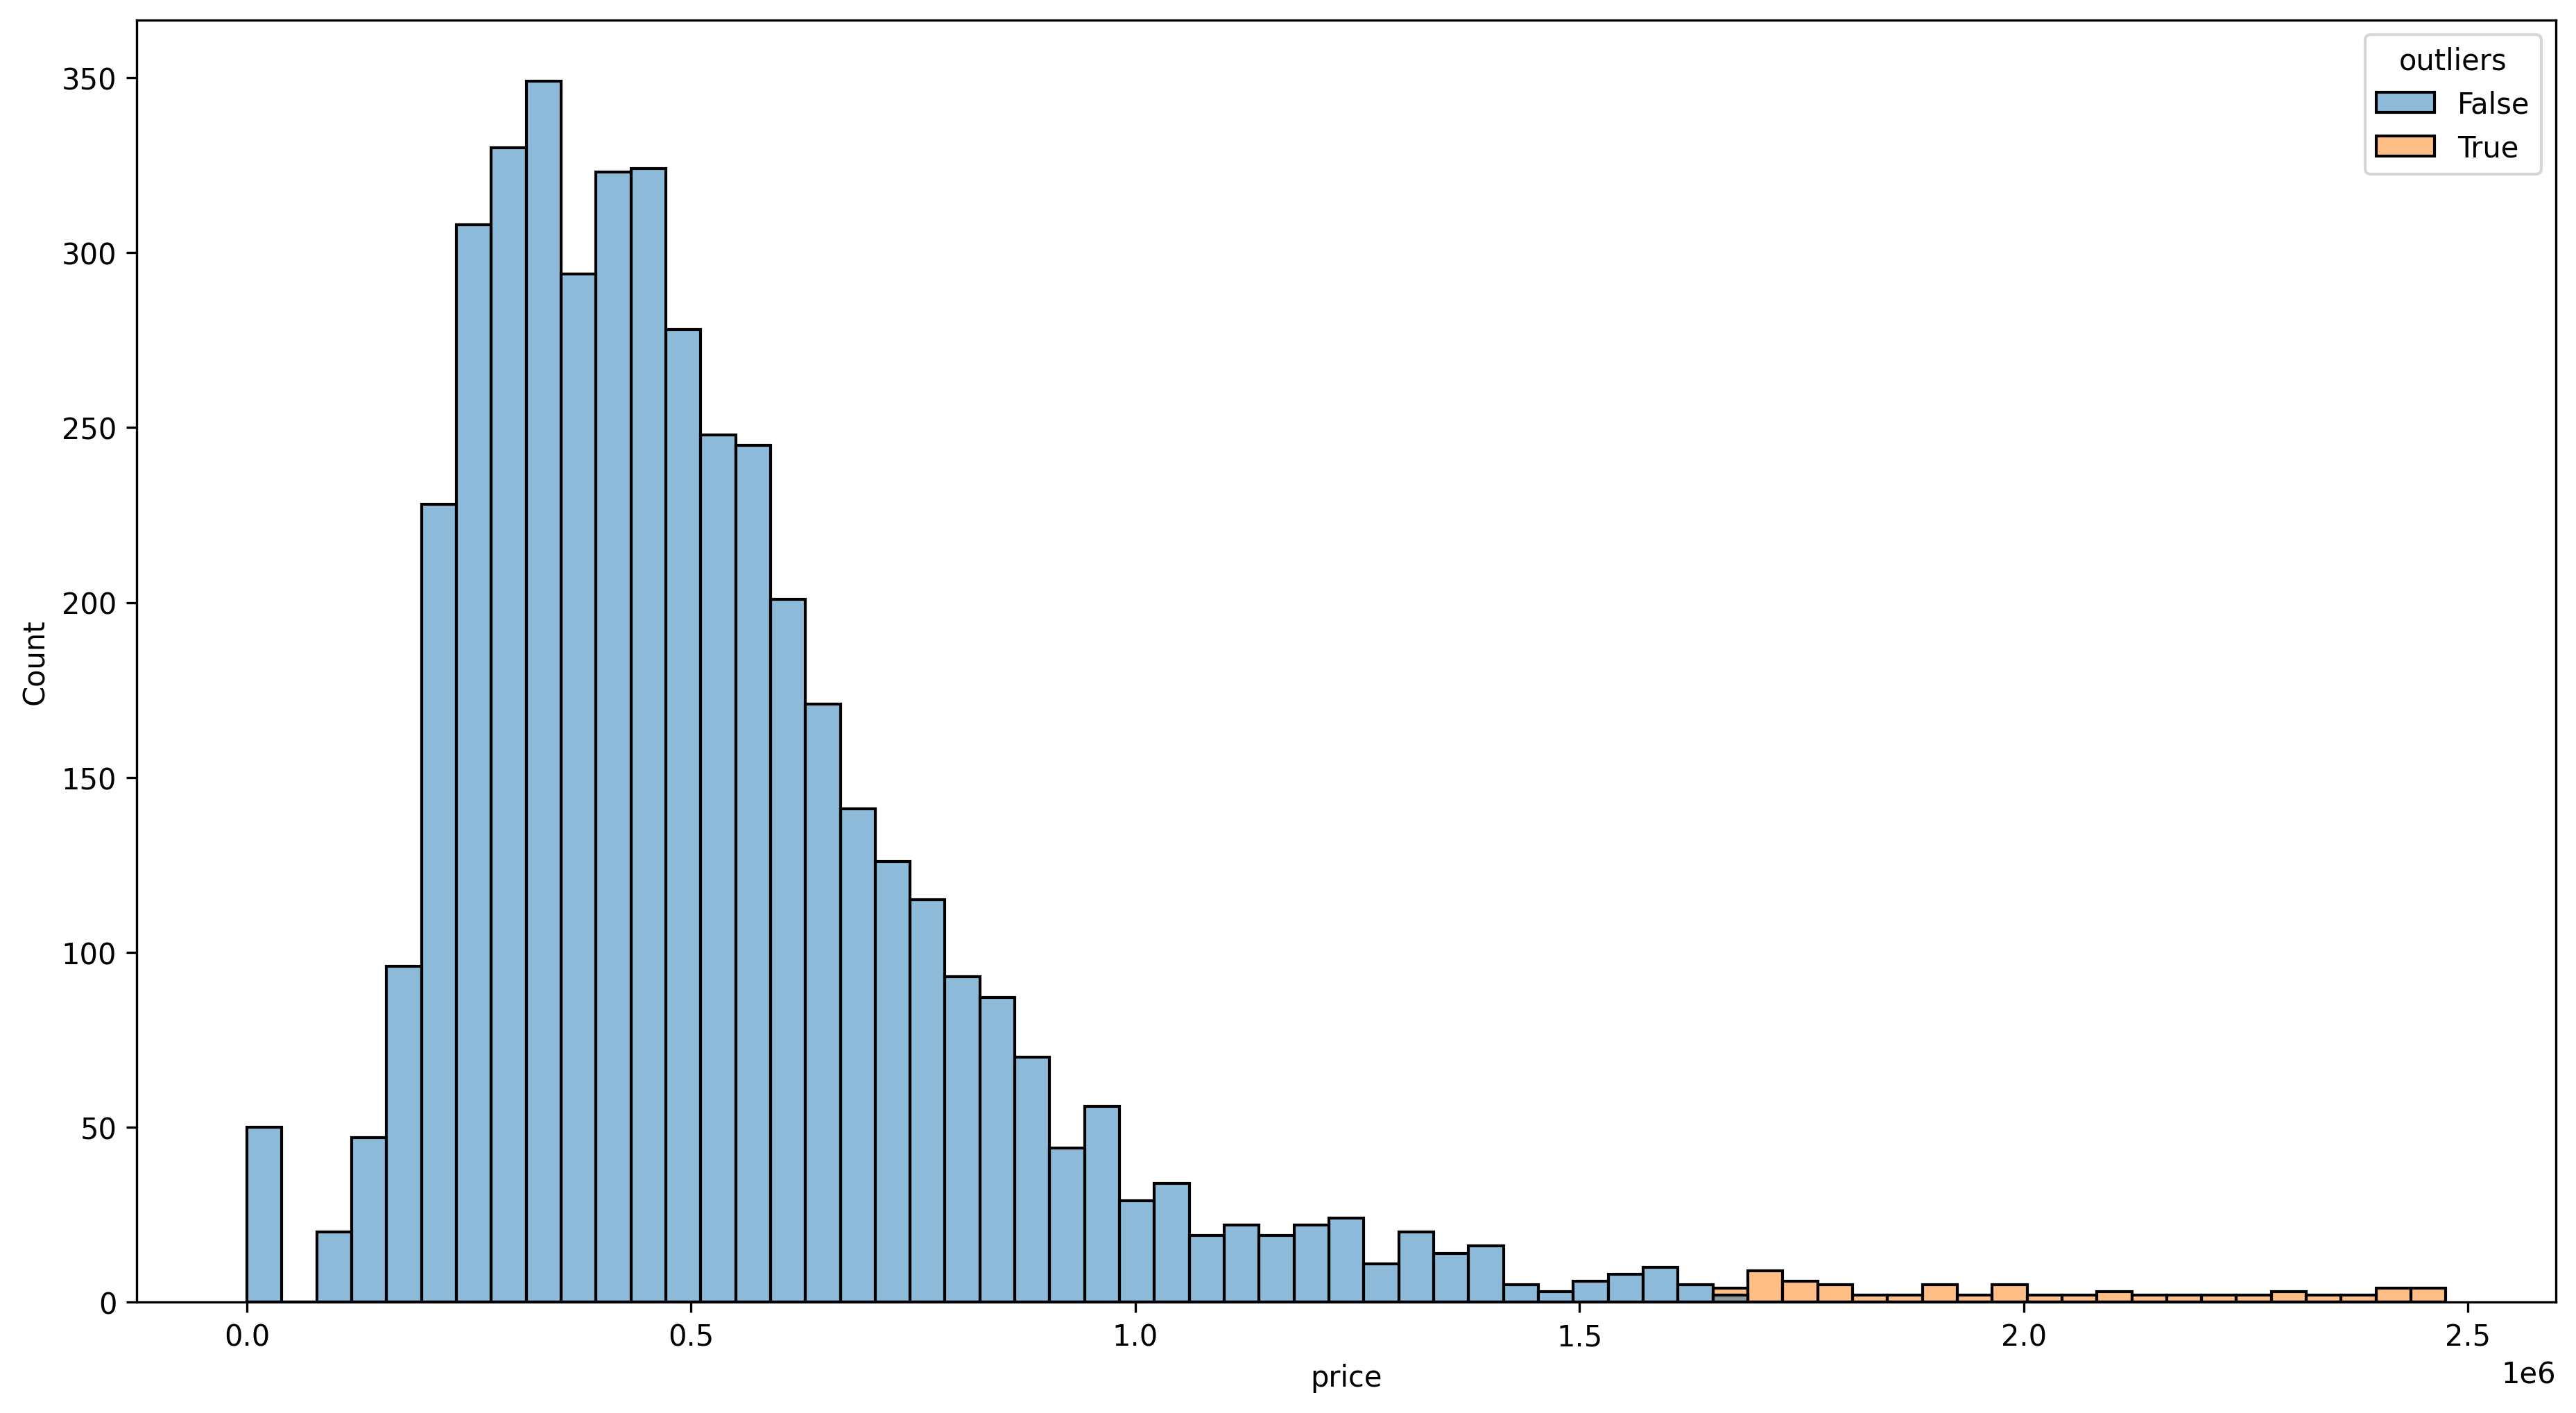

In [112]:
plt.figure(figsize=(15,8), dpi=300)

sns.histplot(data=df[df['price']<2500000], x='price', hue=df['outliers'])

Text(0.5, 1.0, 'After Outlier Treatment')

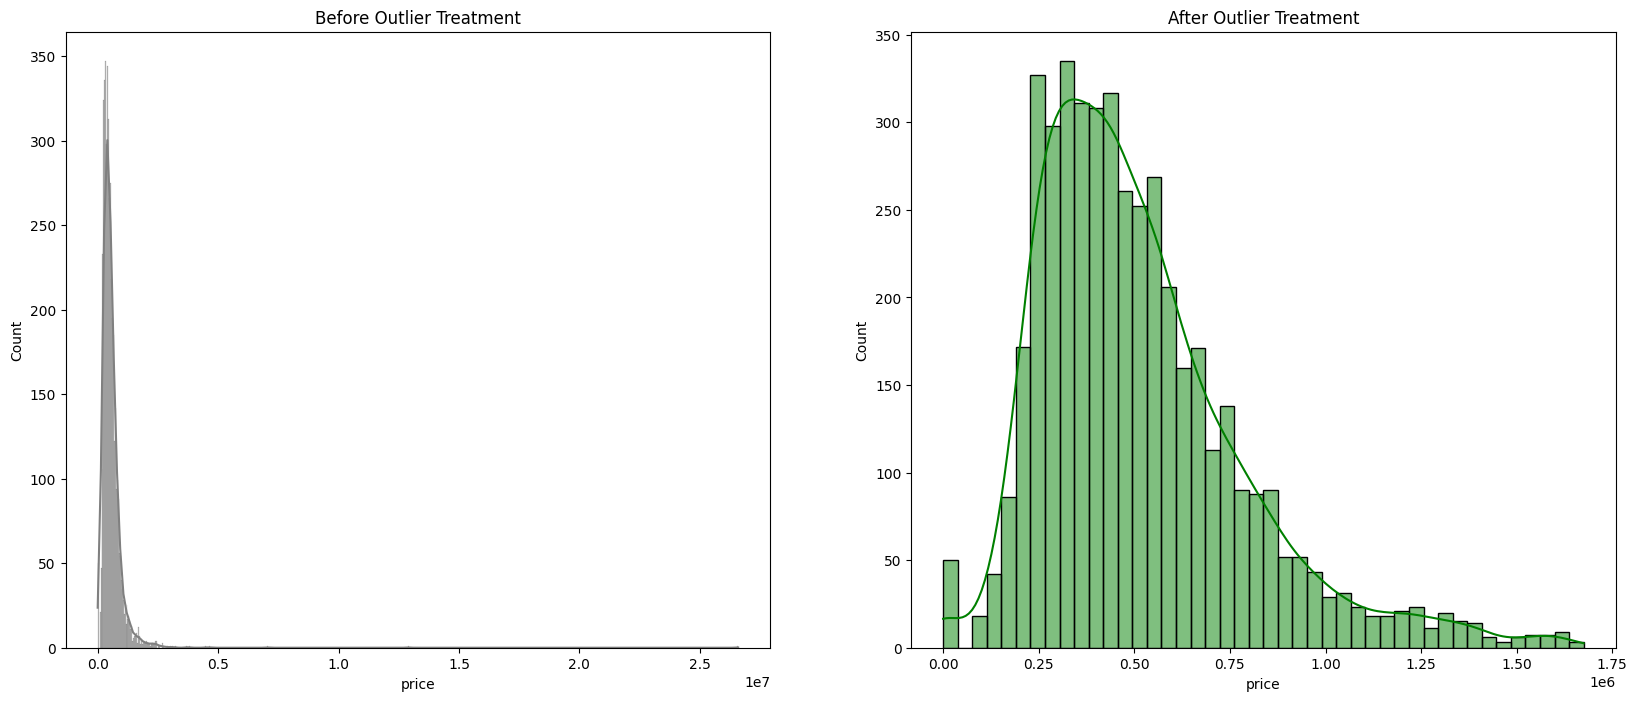

In [113]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20,8))
axes = axes.flatten()
sns.histplot(data=df, x='price', ax=axes[0], kde=True, color='gray')
axes[0].set_title('Before Outlier Treatment')

sns.histplot(data=df[df['outliers']==False], x='price', ax=axes[1], kde=True, color='green')
axes[1].set_title('After Outlier Treatment')


#### Method 3: Using Percentiles

We can remove the data points above 95th percentile and below the 5th percentile

In [114]:
lower_range, upper_range = np.percentile(df['price'], [5,95])
lower_range, upper_range

(200000.0, 1184050.0000000002)

## Feature Extraction

### Binning Operation

In [115]:
df['yr_built'].value_counts(bins=10)

yr_built
(2002.6, 2014.0]      848
(1979.8, 1991.2]      635
(1957.0, 1968.4]      607
(1945.6, 1957.0]      549
(1991.2, 2002.6]      534
(1968.4, 1979.8]      511
(1934.2, 1945.6]      273
(1922.8, 1934.2]      259
(1899.885, 1911.4]    207
(1911.4, 1922.8]      177
Name: count, dtype: int64

Using the `cut()` function

In [118]:
df['Year_Range'] = pd.cut(df['yr_built'], 10)
df[['yr_built', 'Year_Range']].head(10)

,yr_built,Year_Range
0,1955,"(1945.6, 1957.0]"
1,1921,"(1911.4, 1922.8]"
2,1966,"(1957.0, 1968.4]"
3,1963,"(1957.0, 1968.4]"
4,1976,"(1968.4, 1979.8]"
5,1938,"(1934.2, 1945.6]"
6,1976,"(1968.4, 1979.8]"
7,1989,"(1979.8, 1991.2]"
8,1985,"(1979.8, 1991.2]"
9,1945,"(1934.2, 1945.6]"


In [119]:
df['house_age'] = pd.cut(df['yr_built'], 4, labels=['very old', 'old', 'average', 'new'])
df[['yr_built', 'Year_Range', 'house_age']].head(10)

,yr_built,Year_Range,house_age
0,1955,"(1945.6, 1957.0]",old
1,1921,"(1911.4, 1922.8]",very old
2,1966,"(1957.0, 1968.4]",average
3,1963,"(1957.0, 1968.4]",average
4,1976,"(1968.4, 1979.8]",average
5,1938,"(1934.2, 1945.6]",old
6,1976,"(1968.4, 1979.8]",average
7,1989,"(1979.8, 1991.2]",new
8,1985,"(1979.8, 1991.2]",average
9,1945,"(1934.2, 1945.6]",old


#### Deriving Features from Existing Data 
we can calculate total total rooms

In [120]:
df['total_rooms'] = df['bedrooms'] + df['bathrooms']
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_renovated,street,city,statezip,country,price_zscore,outliers,Year_Range,house_age,total_rooms
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864,False,"(1945.6, 1957.0]",old,4.50
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,0,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True,"(1911.4, 1922.8]",very old,7.50
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424,False,"(1957.0, 1968.4]",average,5.00
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,0,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071,False,"(1957.0, 1968.4]",average,5.25
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,1992,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482,False,"(1968.4, 1979.8]",average,6.50


#### Data Transformation

##### Log Transformation
It can be useful for handling skewed data and minimize the impact of outliers using logarithmic scale.

In [121]:
df['log_price'] = np.log(df['price'])
df.head()

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:396: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,street,city,statezip,country,price_zscore,outliers,Year_Range,house_age,total_rooms,log_price
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,...,18810 Densmore Ave N,Shoreline,WA 98133,USA,-0.423864,False,"(1945.6, 1957.0]",old,4.50,12.653958
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,...,709 W Blaine St,Seattle,WA 98119,USA,3.249598,True,"(1911.4, 1922.8]",very old,7.50,14.684290
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,...,26206-26214 143rd Ave SE,Kent,WA 98042,USA,-0.372424,False,"(1957.0, 1968.4]",average,5.00,12.742566
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,...,857 170th Pl NE,Bellevue,WA 98008,USA,-0.234071,False,"(1957.0, 1968.4]",average,5.25,12.948010
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,...,9105 170th Ave NE,Redmond,WA 98052,USA,-0.003482,False,"(1968.4, 1979.8]",average,6.50,13.217674


## Data Scaling (Normalization or Standardization)

- Data scaling is the process of transforming features ina  dataset so they can have comparable magnitudes. 
- It's crucial for many machine learning algorithms and it impacts its overall accuracy and performance 
- We have 2 main methods:
    - Normalization (`MinMaxScaler`):
        - Scaling the data to a fixed range from 0 to 1 (min:0 to max:1)
        - Usage: suitable when the data is not normally distributed 
        - It's very popular for deep learning algorithms
    - Standardization (`StandardScaler`)
        - Transforming the data into a scale with a mean of 0 and standard deviation of 1
        - Usage: when the data is normally distributed 

In [122]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [123]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'price_zscore', 'outliers', 'Year_Range',
       'house_age', 'total_rooms', 'log_price'],
      dtype='object')

In [124]:
X = df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition']]

In [125]:
# normalization
MM_scaler = MinMaxScaler()

X_scaled = MM_scaler.fit_transform(X)
X_scaled

array([[0.01177134, 0.33333333, 0.1875    , ..., 0.        , 0.        ,
        0.5       ],
       [0.08965777, 0.55555556, 0.3125    , ..., 0.        , 1.        ,
        1.        ],
       [0.01286198, 0.33333333, 0.25      , ..., 0.        , 0.        ,
        0.75      ],
       ...,
       [0.01567898, 0.33333333, 0.3125    , ..., 0.        , 0.        ,
        0.5       ],
       [0.00764949, 0.44444444, 0.25      , ..., 0.        , 0.        ,
        0.5       ],
       [0.00829635, 0.33333333, 0.3125    , ..., 0.        , 0.        ,
        0.75      ]])

In [127]:
np.max(X_scaled), np.min(X_scaled)

(1.0, 0.0)

In [128]:
#standardization
stn_scaler = StandardScaler()

X_scaled = stn_scaler.fit_transform(X)
X_scaled

array([[-0.42386353, -0.44112227, -0.84320364, ..., -0.08500441,
        -0.30919434, -0.6671122 ],
       [ 3.2495981 ,  1.75970468,  0.43280154, ..., -0.08500441,
         4.83007931,  2.28641631],
       [-0.37242442, -0.44112227, -0.20520105, ..., -0.08500441,
        -0.30919434,  0.80965205],
       ...,
       [-0.23956224, -0.44112227,  0.43280154, ..., -0.08500441,
        -0.30919434, -0.6671122 ],
       [-0.61826787,  0.6592912 , -0.20520105, ..., -0.08500441,
        -0.30919434, -0.6671122 ],
       [-0.58775916, -0.44112227,  0.43280154, ..., -0.08500441,
        -0.30919434,  0.80965205]])

## Encoding

- In ML, most algorithms expect numerical input and cannot directly handle categorical-text data
- Encoding is used to transform categorical-text data into categorical-numeric. e.g. M/F -> 0/1, Blue, Red, Green -> 2,3,4
- There are different techniques of encoding:
    - Label Encoding 
        - e.g. Gender and Fraud Ind
        - Use mostly for binary categories
    - Ordinal Encoding: 
        - e.g. Educational: High School < Graduate < Masters< PhD -> 0<1<2<3
        - data with ordinal characteristics
    - One Hot Encoding
        - Multi-categorical data with no ordinal characteristics
        - e.g. House type (single family / condo/ townhome) color: (Blue, Red, Green)

In [154]:
df = pd.read_csv('/Users/bassel_instructor/Documents/Datasets/school_grades.csv')
df.head()

,gender,class group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,high school,standard,completed,67,67,63
1,female,group D,some high school,free/reduced,none,40,59,55
2,male,group E,some college,free/reduced,none,59,60,50
3,male,group B,high school,standard,none,77,78,68
4,male,group E,associate's degree,standard,completed,78,73,68


Using `sklearn`

In [155]:
from sklearn import preprocessing

We can see that gender, lunch, and test prep all need label encoding.

In [156]:
df_1 = df.copy()

In [157]:
LE = preprocessing.LabelEncoder()

df_1['gender'] = LE.fit_transform(df_1['gender'])

df_1.head()

,gender,class group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,1,group A,high school,standard,completed,67,67,63
1,0,group D,some high school,free/reduced,none,40,59,55
2,1,group E,some college,free/reduced,none,59,60,50
3,1,group B,high school,standard,none,77,78,68
4,1,group E,associate's degree,standard,completed,78,73,68


In [158]:
df_1['gender'].unique()

array([1, 0])

Using `pandas`

In [159]:
df_2 = df.copy()

In [160]:
#method 1
df_2['gender'] = df_2['gender'].map({'female':0,'male':1})

In [161]:
df_2['gender'].unique()

array([1, 0])

In [162]:
#method 2
df_3 = df.copy()

df_3['gender'], _ = pd.factorize(df_3['gender'])

df_3['gender'].unique()

array([0, 1])

In [163]:
df_3

,gender,class group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,0,group A,high school,standard,completed,67,67,63
1,1,group D,some high school,free/reduced,none,40,59,55
2,0,group E,some college,free/reduced,none,59,60,50
3,0,group B,high school,standard,none,77,78,68
4,0,group E,associate's degree,standard,completed,78,73,68
...,...,...,...,...,...,...,...,...
995,0,group C,high school,standard,none,73,70,65
996,0,group D,associate's degree,free/reduced,completed,85,91,92
997,1,group C,some high school,free/reduced,none,32,35,41
998,1,group C,some college,standard,none,73,74,82


We can see that parental level of education needs to have ordinal encoding

In [164]:
df_4 = df.copy()

In [165]:
df_4['parental level of education'].unique()

array(['high school', 'some high school', 'some college',
       "associate's degree", "bachelor's degree", "master's degree"],
      dtype=object)

In [166]:
OE = preprocessing.OrdinalEncoder(categories=[['some high school','high school','some college',
                                               "associate's degree","bachelor's degree", "master's degree"]])

df_4['parental level of education'] = OE.fit_transform(df_4[['parental level of education']])

df_4.head()

,gender,class group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,1.0,standard,completed,67,67,63
1,female,group D,0.0,free/reduced,none,40,59,55
2,male,group E,2.0,free/reduced,none,59,60,50
3,male,group B,1.0,standard,none,77,78,68
4,male,group E,3.0,standard,completed,78,73,68


Using `pandas`

In [167]:
df_5 = df.copy()

In [168]:
df_5['parental level of education'] = df_5['parental level of education'].map(
                                            {'some high school':0,'high school':1,'some college':2,
                                               "associate's degree":3,"bachelor's degree":4, "master's degree":5}
                                                )

df_5.head()

,gender,class group,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,male,group A,1,standard,completed,67,67,63
1,female,group D,0,free/reduced,none,40,59,55
2,male,group E,2,free/reduced,none,59,60,50
3,male,group B,1,standard,none,77,78,68
4,male,group E,3,standard,completed,78,73,68


#### One-Hot Encoding

![one_hot](https://labcontent.simplicdn.net/data-content/content-assets/Data_and_AI/Applied_Machine_Learning/Images/0.4_Feature_Engineering/Trainer_PPT_and_IPYNB/one_hot.png)

In [173]:
data = {
    'car color': ['Blue', 'Red', 'Yellow', 'Red','Red', 'Blue', 'Yellow'],
    'car speed': [180, 155, 120, 175, 110, 95, 99]
}

df = pd.DataFrame(data)
df

,car color,car speed
0,Blue,180
1,Red,155
2,Yellow,120
3,Red,175
4,Red,110
5,Blue,95
6,Yellow,99


In [174]:
OHE = preprocessing.OneHotEncoder(sparse=False)

X = OHE.fit_transform(df[['car color']])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [175]:
X

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.]])